# GIẢI THUẬT 3: BAYES NGÂY THƠ (NAÏVE BAYES)

## 2.3.1. Ôn tập lý thuyết

## Giải thuật Naive Bayes hoạt động như thế nào? Hãy giải thích định lý Bayes và giả định "ngây thơ" trong thuật toán này?

Naive Bayes (hay "Bayes Ngây thơ") là một thuật toán học máy thuộc nhóm phân loại (classification) dựa trên xác suất.

Nhiệm vụ chính của nó là dự đoán một đối tượng (ví dụ: một email) thuộc về "lớp" (category) nào (ví dụ: "Spam" hay "Không phải Spam"), dựa trên các "đặc trưng" (features) của đối tượng đó (ví dụ: các từ xuất hiện trong email).

### Giải thích định lý Bayes:

Định lý Bayes là một công thức toán học mô tả cách cập nhật xác suất của một giả thuyết dựa trên bằng chứng mới thu được. Đây là cốt lõi của suy luận Bayes và là nền tảng cho thuật toán Naive Bayes. Công thức của định lý được phát biểu như sau:
 $$P(y|X) = \frac{P(X|y) \cdot P(y)}{P(X)}$$

Mỗi thành phần trong công thức này mang một ý nghĩa riêng biệt và quan trọng:

 + Xác suất Hậu nghiệm (Posterior Probability), $P(y|X)$: Đây là xác suất của giả thuyết $y$ (ví dụ: một email thuộc lớp "spam") là đúng, sau khi đã quan sát bằng chứng $X$ (ví dụ: nội dung của email). Đây chính là kết quả mà chúng ta muốn tính toán trong một bài toán phân loại.

 + Khả năng (Likelihood), $P(X|y)$: Đây là xác suất quan sát thấy bằng chứng $X$ nếu giả thuyết $y$ là đúng. Ví dụ, đây là xác suất một email chứa các từ "miễn phí", "khuyến mãi" khi biết rằng nó là "spam". Giá trị này được tính toán từ dữ liệu huấn luyện.

 + Xác suất Tiên nghiệm (Prior Probability), $P(y)$: Đây là xác suất ban đầu của giả thuyết $y$ trước khi có bất kỳ bằng chứng nào. Nó thể hiện niềm tin ban đầu của chúng ta về giả thuyết đó. Trong thực tế, nó thường là tần suất xuất hiện của mỗi lớp trong tập dữ liệu.

 + Bằng chứng (Evidence), $P(X)$: Đây là xác suất quan sát thấy bằng chứng $X$ trên tất cả các giả thuyết có thể. Nó đóng vai trò là một hằng số chuẩn hóa để đảm bảo rằng tổng các xác suất hậu nghiệm bằng 1.

Để minh họa, hãy xem xét ví dụ về chẩn đoán y tế: 

$P(\text{Bệnh}|\text{Triệu chứng}) = \frac{P(\text{Triệu chứng}|\text{Bệnh}) \cdot P(\text{Bệnh})}{P(\text{Triệu chứng})}$. 

Định lý Bayes cho phép chúng ta cập nhật niềm tin về khả năng một bệnh nhân mắc bệnh sau khi quan sát các triệu chứng của họ.

### Giả định "ngây thơ"?

Thách thức lớn nhất khi áp dụng quy tắc trên nằm ở việc tính toán $P(X|y) = P(x_1, x_2,..., x_n|y)$. Việc tính toán xác suất đồng thời này đòi hỏi một lượng dữ liệu khổng lồ để ước tính chính xác mối quan hệ phức tạp giữa tất cả các đặc trưng, một vấn đề được gọi là "lời nguyền của không gian nhiều chiều" (curse of dimensionality).

Đây là lúc giả định "ngây thơ" (naive) phát huy tác dụng. Thuật toán Naive Bayes đưa ra một giả định mạnh mẽ nhưng giúp đơn giản hóa đáng kể bài toán: tất cả các đặc trưng đều độc lập có điều kiện với nhau khi biết lớp $y$. Mặc dù giả định này hiếm khi đúng trong thực tế, nó lại là chìa khóa cho hiệu quả của thuật toán.

Với giả định này, xác suất khả năng có thể được tính bằng tích của các xác suất riêng lẻ:

$$P(X|y) = P(x_1, x_2,..., x_n|y) \approx \prod_{i=1}^{n} P(x_i|y)$$

Ví dụ, khi phân loại một email là spam, thuật toán giả định rằng sự xuất hiện của từ "sale" không liên quan đến sự xuất hiện của từ "free", miễn là chúng ta đã biết email đó thuộc lớp spam. Giả định này rõ ràng là một sự đơn giản hóa quá mức, nhưng nó cho phép mô hình học và đưa ra dự đoán cực kỳ nhanh chóng.

Công thức Toán học của Bộ phân loại Naive Bayes

Kết hợp quy tắc quyết định MAP với giả định độc lập ngây thơ, chúng ta có được công thức phân loại cuối cùng cho Naive Bayes:$$y_{predicted} = \underset{y}{\operatorname{argmax}} \left[ P(y) \cdot \prod_{i=1}^{n} P(x_i|y) \right]$$

Công thức này là nền tảng của thuật toán, cho phép tính toán lớp có khả năng cao nhất cho một điểm dữ liệu mới một cách hiệu quả bằng cách sử dụng các xác suất được ước tính từ tập dữ liệu huấn luyện.

Một điểm khác biệt quan trọng là Naive Bayes thuộc nhóm mô hình sinh (generative model). Thay vì học một ranh giới quyết định trực tiếp giữa các lớp như các mô hình phân biệt (discriminative model) như Hồi quy Logistic hay Máy Vector Hỗ trợ (SVM), Naive Bayes học mô hình phân phối của dữ liệu trong mỗi lớp ($P(X|y)$). Sau đó, nó sử dụng định lý Bayes để suy ra xác suất một điểm dữ liệu thuộc về một lớp cụ thể ($P(y|X)$). Việc mô hình hóa cách dữ liệu được "sinh ra" cho mỗi lớp giải thích tại sao nó có thể hoạt động tốt ngay cả với lượng dữ liệu huấn luyện hạn chế.

## Các loại mô hình Naive Bayes (Gaussian, Multinomial, Bernoulli) khác nhau ra sao? Khi nào nên sử dụng từng loại?

### Phân loại các Mô hình Naive Bayes

Thuật toán Naive Bayes không phải là một mô hình duy nhất mà là một họ các thuật toán. Sự khác biệt chính giữa các biến thể nằm ở giả định về phân phối xác suất của các đặc trưng đầu vào ($P(x_i|y)$). Việc lựa chọn mô hình phù hợp phụ thuộc hoàn toàn vào bản chất của dữ liệu.

Gaussian Naive Bayes: Mô hình hóa các Đặc trưng Liên tục

Gaussian Naive Bayes (GNB) được sử dụng khi các đặc trưng đầu vào là các giá trị số liên tục, chẳng hạn như chiều cao, nhiệt độ, hoặc giá trị pixel trong một hình ảnh. Mô hình này giả định rằng các giá trị của mỗi đặc trưng, trong mỗi lớp, tuân theo một phân phối Gaussian (hay phân phối chuẩn).

Trong quá trình huấn luyện, GNB ước tính hai tham số cho mỗi đặc trưng trong mỗi lớp: giá trị trung bình ($\mu_y$) và phương sai ($\sigma^2_y$) bằng phương pháp ước lượng hợp lý tối đa (maximum likelihood estimation). Sau đó, hàm mật độ xác suất của phân phối Gaussian được sử dụng để tính toán giá trị khả năng $P(x_i|y)$ cho một giá trị đặc trưng mới.

Multinomial Naive Bayes: Mô hình hóa các Phép đếm và Tần suất Rời rạc

Multinomial Naive Bayes (MNB) là biến thể phổ biến nhất và là "con ngựa thồ" trong lĩnh vực phân loại văn bản. Nó được thiết kế cho các đặc trưng biểu thị các phép đếm rời rạc, chẳng hạn như số lần một từ xuất hiện trong một tài liệu (mô hình túi từ - bag-of-words).

Trong MNB, xác suất khả năng $P(x_i|y)$ được ước tính bằng tần suất tương đối của đặc trưng $i$ (ví dụ: từ "offer") trong tất cả các mẫu thuộc lớp $y$. Một kỹ thuật quan trọng đi kèm với MNB là làm mịn (smoothing), chẳng hạn như làm mịn Laplace (add-one) hoặc Lidstone. Kỹ thuật này cộng một giá trị nhỏ (alpha) vào tất cả các phép đếm để đảm bảo không có xác suất nào bằng không, đặc biệt là đối với những từ xuất hiện trong tập kiểm tra nhưng không có trong tập huấn luyện của một lớp cụ thể

Bernoulli Naive Bayes: Mô hình hóa các Đặc trưng Nhị phân và Sự Hiện diện/Vắng mặt

Bernoulli Naive Bayes (BNB) được sử dụng cho các đặc trưng nhị phân (boolean), tức là các đặc trưng chỉ có hai giá trị, thường là 0 và 1, biểu thị sự vắng mặt hoặc hiện diện của một thuộc tính. Trong phân loại văn bản, điều này có nghĩa là mô hình chỉ quan tâm liệu một từ có xuất hiện trong tài liệu hay không, chứ không phải tần suất xuất hiện của nó.   

Mô hình này ước tính xác suất một đặc trưng có mặt (giá trị 1) đối với mỗi lớp. Một điểm khác biệt quan trọng so với MNB là BNB cũng xem xét cả sự vắng mặt của các đặc trưng (non-occurring terms) khi tính toán xác suất, điều này có thể hữu ích trong một số trường hợp nhất định. 

### Phân tích So sánh: Lựa chọn Mô hình Phù hợp cho Dữ liệu của bạn

Việc lựa chọn giữa Gaussian, Multinomial, và Bernoulli Naive Bayes không phải là về việc mô hình nào "tốt hơn" một cách tuyệt đối, mà là mô hình nào có giả định phù hợp nhất với loại dữ liệu bạn đang xử lý. Sử dụng sai mô hình—ví dụ, áp dụng GNB cho dữ liệu đếm từ—sẽ vi phạm các giả định cốt lõi và dẫn đến hiệu suất kém. Bảng dưới đây tóm tắt các đặc điểm chính để hỗ trợ việc ra quyết định.

Gaussian Naive Bayes

 + Loại Dữ liệu Đặc trưng: Liên tục, giá trị thực (ví dụ: chiều cao, nhiệt độ) 
 + Phân phối Giả định: Phân phối Gaussian (Chuẩn)
 + Ứng dụng Tiêu biểu: Dữ liệu cảm biến, đo lường y tế, nhận dạng hình ảnh (giá trị pixel)
 + Ví dụ Biểu diễn Đặc trưng: Một vector các số thực: [5.1, 3.5, 1.4, 0.2]
 + Lớp trong Scikit-learn: GaussianNB

Multinomial Naive Bayes

 + Loại Dữ liệu Đặc trưng: Đếm hoặc tần suất không âm (ví dụ: số lần xuất hiện của từ)
 + Phân phối Giả định: Phân phối Đa thức (Multinomial) 
 + Ứng dụng Tiêu biểu: Phân loại văn bản, lọc thư rác, phân tích chủ đề
 + Ví dụ Biểu diễn Đặc trưng: Một vector đếm từ: [0, 2, 1, 0,...]
 + Lớp trong Scikit-learn: MultinomialNB

Bernoulli Naive Bayes

 + Loại Dữ liệu Đặc trưng: Nhị phân/Boolean (0 hoặc 1, hiện diện/vắng mặt) 
 + Phân phối Giả định: Phân phối Bernoulli 
 + Ứng dụng Tiêu biểu: Phân loại văn bản (khi chỉ quan tâm sự hiện diện của từ), phát hiện spam 
 + Ví dụ Biểu diễn Đặc trưng: Một vector nhị phân: [0, 1, 1, 0,...]
 + Lớp trong Scikit-learn: BernoulliNB

## Tại sao Naive Bayes được gọi là "ngây thơ"? Giả định về tính độc lập của các đặc trưng ảnh hưởng như thế nào đến hiệu suất của mô hình?

Giả định cốt lõi về tính độc lập của các đặc trưng vừa là điểm yếu lớn nhất của Naive Bayes, vừa là bí mật đằng sau hiệu quả đáng kinh ngạc của nó. Việc hiểu rõ hai mặt của vấn đề này là rất quan trọng để sử dụng thuật toán một cách hiệu quả.

### Tại sao Naive Bayes được gọi là "ngây thơ"? Khám phá sự Phụ thuộc giữa các Đặc trưng trong Dữ liệu Thực tế

Trong hầu hết các kịch bản thực tế, giả định độc lập là một sự đơn giản hóa quá mức và thường không đúng. Các đặc trưng thường có mối tương quan với nhau. Ví dụ:   

 + Trong phân loại văn bản: Các từ "San" và "Francisco" có khả năng xuất hiện cùng nhau rất cao. Giả định chúng độc lập là không thực tế.   

 + Trong chẩn đoán y tế: Các chỉ số như huyết áp cao và mức cholesterol cao thường có mối liên hệ với nhau.

 + Trong lọc thư rác: Sự hiện diện của từ "miễn phí" và "khuyến mãi" không phải là các sự kiện độc lập. 

Việc bỏ qua các mối quan hệ này là điểm yếu lý thuyết chính của mô hình, vì nó không thể nắm bắt được sự tương tác phức tạp giữa các đặc trưng. 

Mặt Tích cực của sự Ngây thơ: Hiệu quả Tính toán và Hiệu suất trong Không gian Nhiều chiều

Mặc dù có thiếu sót về mặt lý thuyết, giả định độc lập lại mang lại những lợi ích thực tiễn to lớn. Lợi ích chính là hiệu quả tính toán. Bằng cách chia xác suất đồng thời thành tích của các xác suất riêng lẻ, Naive Bayes tránh được "lời nguyền của không gian nhiều chiều". Nó đòi hỏi ít dữ liệu hơn đáng kể để ước tính các tham số ($P(x_i|y)$) so với việc ước tính toàn bộ xác suất đồng thời $P(x_1,..., x_n|y)$. Điều này dẫn đến thời gian huấn luyện và dự đoán cực kỳ nhanh, làm cho nó đặc biệt phù hợp với các bộ dữ liệu có số chiều cao, chẳng hạn như dữ liệu văn bản với hàng chục nghìn từ vựng.

Mặt Tiêu cực: Ảnh hưởng đến việc Hiệu chỉnh Xác suất

Vì giả định độc lập thường bị vi phạm, các xác suất hậu nghiệm do Naive Bayes tính toán thường không đáng tin cậy và có xu hướng bị đẩy về các giá trị cực đoan (0 hoặc 1). Điều này làm cho Naive Bayes trở thành một "công cụ ước lượng tồi" (poor estimator). Mặc dù mô hình có thể phân loại chính xác một email là spam, nhưng việc nó đưa ra dự đoán "xác suất 99.99% là spam" có thể là một ước tính quá tự tin và không chính xác về mặt toán học.

Khi nào Naive Bayes Vượt trội Bất chấp Giả định Sai lầm

Nghịch lý lớn nhất của Naive Bayes là: tại sao một mô hình với tiền đề sai lầm lại hoạt động tốt đến vậy? Câu trả lời nằm ở sự khác biệt giữa việc phân loại và việc ước tính xác suất. Đối với bài toán phân loại, chúng ta chỉ cần xác định lớp nào có xác suất hậu nghiệm cao nhất, chứ không cần giá trị chính xác của xác suất đó.   

Miễn là các lỗi do giả định độc lập gây ra không làm thay đổi thứ hạng xác suất của các lớp, thì quyết định phân loại cuối cùng vẫn sẽ đúng. Ví dụ, nếu giả định này làm tăng xác suất của tất cả các lớp một cách tương đối, lớp có xác suất cao nhất ban đầu vẫn sẽ là lớp có xác suất cao nhất sau đó. Điều này giải thích tại sao Naive Bayes thường là một "bộ phân loại tốt" ngay cả khi nó là một "công cụ ước lượng tồi". Sự tách biệt giữa độ chính xác phân loại và độ chính xác ước tính xác suất là một khái niệm cơ bản nhưng sâu sắc, giải thích hiệu quả của nhiều mô hình đơn giản trong thực tế.

## Ưu điểm và hạn chế của Naive Bayes so với các thuật toán phân loại khác như SVM hoặc Random Forest là gì?

Để định vị Naive Bayes trong bối cảnh học máy rộng lớn hơn, việc so sánh nó với các thuật toán phức tạp và thường có hiệu suất cao hơn như Máy Vector Hỗ trợ (SVM) và Rừng Ngẫu nhiên (Random Forest) là cần thiết.

### Naive Bayes so với Máy Vector Hỗ trợ (SVM)

Đây là sự so sánh giữa một mô hình sinh xác suất (NB) và một mô hình phân biệt hình học (SVM).

 + Naive Bayes học phân phối xác suất của dữ liệu cho mỗi lớp và sử dụng định lý Bayes để đưa ra quyết định.

 + SVM tìm một siêu phẳng tối ưu (optimal hyperplane) trong không gian đặc trưng để phân tách các lớp với lề (margin) lớn nhất.

SVM, đặc biệt khi sử dụng các hàm hạt nhân (kernels), có thể nắm bắt các mối quan hệ phi tuyến tính phức tạp giữa các đặc trưng, điều mà Naive Bayes không thể làm được. Do đó, SVM thường đạt độ chính xác cao hơn trong nhiều bài toán. Tuy nhiên, Naive Bayes nhanh hơn đáng kể trong việc huấn luyện, đặc biệt là với các bộ dữ liệu lớn.

### Naive Bayes so với Rừng Ngẫu nhiên (Random Forest)

So sánh này đặt một mô hình đơn giản (NB) cạnh một phương pháp học tập hợp mạnh mẽ (Random Forest).

 + Rừng Ngẫu nhiên xây dựng một tập hợp gồm nhiều cây quyết định và tổng hợp dự đoán của chúng. Bằng cách này, nó có thể mô hình hóa các tương tác rất phức tạp, phi tuyến tính giữa các đặc trưng và thường cho kết quả rất chính xác.   

 + Naive Bayes không thể mô hình hóa các tương tác này do giả định độc lập.

Tuy nhiên, Rừng Ngẫu nhiên đòi hỏi nhiều tài nguyên tính toán hơn, chậm hơn trong việc huấn luyện và dự đoán, và khó diễn giải hơn so với Naive Bayes.

### Phân tích Tốc độ, Khả năng Mở rộng và Yêu cầu Dữ liệu

Naive Bayes
 + Tốc độ Huấn luyện: Rất nhanh
 + Tốc độ Dự đoán: Rất nhanh 
 + Khả năng Mở rộng: Rất tốt, tỷ lệ tuyến tính 
 + Yêu cầu Dữ liệu: Hoạt động tốt với dữ liệu nhỏ 
 + Khả năng Diễn giải: Cao (dựa trên xác suất)

SVM 
 + Tốc độ Huấn luyện: Chậm hơn, đặc biệt với dữ liệu lớn
 + Tốc độ Dự đoán: Nhanh 
 + Khả năng Mở rộng: Kém hơn, có thể là $O(n^2)$ hoặc $O(n^3)$
 + Yêu cầu Dữ liệu: Thường cần nhiều dữ liệu hơn
 + Khả năng Diễn giải: Trung bình (dựa trên vector hỗ trợ)

Random Forest
 + Tốc độ Huấn luyện: Chậm, phụ thuộc vào số cây
 + Tốc độ Dự đoán: Tương đối chậm
 + Khả năng Mở rộng: Tốt, có thể song song hóa
 + Yêu cầu Dữ liệu: Cần nhiều dữ liệu để tránh quá khớp
 + Khả năng Diễn giải: Thấp (mô hình hộp đen)

Từ những so sánh này, một vai trò chiến lược quan trọng của Naive Bayes trong quy trình làm việc của học máy hiện đại đã được hình thành. Do tốc độ, sự đơn giản và hiệu suất cơ bản tốt, nó là một lựa chọn tuyệt vời để làm mô hình cơ sở (baseline model). Việc triển khai Naive Bayes chỉ mất vài phút và cung cấp một thước đo hiệu suất ban đầu. Bất kỳ mô hình phức tạp nào sau đó được triển khai (như SVM hay Random Forest) đều phải chứng minh được giá trị của nó bằng cách vượt qua đáng kể đường cơ sở này, qua đó giúp các nhà khoa học dữ liệu quyết định xem sự phức tạp và chi phí tính toán tăng thêm có đáng giá hay không.

## Viết đoạn code mẫu bằng Python (sử dụng Scikit-learn) để xây dựng một mô hình Naive Bayes (ví dụ: Gaussian Naive Bayes) không? Hãy mô tả các bước thực hiện

### Triển khai Gaussian Naive Bayes

1. Tạo dữ liệu và Chuẩn bị Chúng ta sử dụng hàm make_blobs để tạo một tập dữ liệu tổng hợp phù hợp cho GNB và train_test_split để chia nó thành tập huấn luyện và kiểm tra.   

2. Huấn luyện Mô hình và Dự đoán Khởi tạo lớp GaussianNB, huấn luyện nó bằng phương thức .fit() trên dữ liệu huấn luyện, và sau đó sử dụng phương thức .predict() để dự đoán nhãn cho dữ liệu kiểm tra.   

3. Đánh giá và Trực quan hóa Độ chính xác của mô hình được tính bằng accuracy_score. Chúng ta cũng có thể lấy xác suất dự đoán bằng .predict_proba() và trực quan hóa ranh giới quyết định của mô hình, vốn thường có dạng bậc hai (quadratic) đối với GNB.

Độ chính xác của mô hình: 1.0000


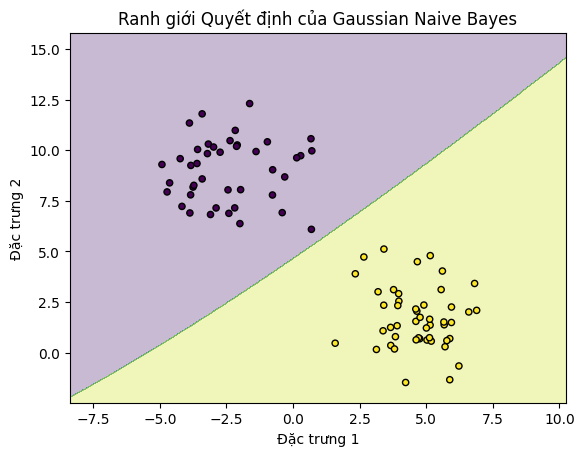

In [1]:
# 1. Import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 2. Tạo dữ liệu tổng hợp
# 300 mẫu, 2 đặc trưng, 2 lớp, độ lệch chuẩn cụm là 1.5
X, y = make_blobs(n_samples=300, centers=2, n_features=2,
                  random_state=42, cluster_std=1.5)

# 3. Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Khởi tạo và huấn luyện mô hình Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 5. Thực hiện dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# 6. Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Độ chính xác của mô hình: {accuracy:.4f}')

# 7. Trực quan hóa ranh giới quyết định (tùy chọn)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolor='k', cmap='viridis')
plt.title('Ranh giới Quyết định của Gaussian Naive Bayes')
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')
plt.show()

Các điểm (Dots):

 + Đây chính là dữ liệu trong tập kiểm tra (X_test).

 + Các điểm màu tím (phía trên bên trái): Đại diện cho Lớp 0 (class 0).

 + Các điểm màu vàng (phía dưới bên phải): Đại diện cho Lớp 1 (class 1).

 + Đây là "sự thật" (ground truth) mà mô hình cần dự đoán đúng.

Các vùng màu nền (Background Regions):

 + Đây là "quyết định" của mô hình cho mọi vị trí trong không gian.

 + Vùng màu tím (Lilac): Bất kỳ điểm dữ liệu mới nào rơi vào vùng này sẽ được mô hình dự đoán là Lớp 0.

 + Vùng màu vàng (Yellow/Light Green): Bất kỳ điểm dữ liệu mới nào rơi vào vùng này sẽ được mô hình dự đoán là Lớp 1.

Ranh giới Quyết định (Decision Boundary):

 + Đây là đường thẳng (hoặc đường cong) nằm giữa hai vùng màu.

 + Tại chính đường ranh giới này, mô hình "phân vân" nhất, tức là xác suất một điểm thuộc Lớp 0 hay Lớp 1 là 50/50.

Kết luận từ biểu đồ

 + Mô hình hoạt động tốt: Có thể thấy rằng hầu hết các điểm màu tím đều nằm gọn trong vùng dự đoán màu tím và hầu hết các điểm màu vàng đều nằm gọn trong vùng dự đoán màu vàng.

 + Đánh giá độ chính xác: Kết quả print(f'Độ chính xác...{accuracy:.4f}') trong code của bạn (có thể là 1.0000 hoặc một số rất cao như 0.9889) chính là con số định lượng cho thấy mức độ "khớp" hoàn hảo này.

 + Tại sao là Gaussian Naive Bayes? Mô hình này giả định rằng mỗi lớp (màu tím, màu vàng) được phân phối theo hình "quả chuông" (Phân phối Gaussian/Normal). Mô hình đã tìm thấy ranh giới (trong trường hợp này là một đường thẳng) để tách hai "quả chuông" này một cách hiệu quả nhất.

Vấn đề Tần suất Bằng không và Kỹ thuật Làm mịn (Smoothing)

Một vấn đề thực tế quan trọng đối với Multinomial và Bernoulli Naive Bayes là "vấn đề tần suất bằng không". Nếu một đặc trưng (ví dụ: một từ) trong tập kiểm tra chưa từng xuất hiện trong tập huấn luyện cho một lớp cụ thể, xác suất khả năng của nó sẽ bằng 0. Do công thức của Naive Bayes là một phép nhân, điều này sẽ khiến toàn bộ xác suất hậu nghiệm của lớp đó bằng 0, bất kể các đặc trưng khác có giá trị như thế nào.

Để giải quyết vấn đề này, các kỹ thuật làm mịn được sử dụng. Phổ biến nhất là làm mịn Laplace (hay add-one smoothing), trong đó một số giả (pseudo-count) nhỏ, thường là 1, được cộng vào số đếm của mọi đặc trưng. Trong Scikit-learn, tham số alpha trong các lớp MultinomialNB và BernoulliNB kiểm soát mức độ làm mịn này. Đặt alpha=1.0 tương ứng với làm mịn Laplace.

## Làm thế nào để xử lý dữ liệu phân loại (categorical data) trước khi áp dụng Multinomial Naive Bayes trong Python?

Phân loại văn bản là ứng dụng tiêu biểu và thành công nhất của Naive Bayes, đặc biệt là biến thể Multinomial. Phần này sẽ hướng dẫn xây dựng một bộ phân loại văn bản hoàn chỉnh, tập trung vào bước tiền xử lý quan trọng là vector hóa.

### Từ Văn bản Thô đến Vector Đặc trưng: Quy trình Vector hóa

Các mô hình học máy không thể xử lý trực tiếp văn bản thô; nó phải được chuyển đổi thành một định dạng số học. Quá trình này được gọi là trích xuất đặc trưng hoặc vector hóa. Hai phương pháp phổ biến nhất cho Naive Bayes là Bag-of-Words và TF-IDF. 

Kỹ thuật 1: Sử dụng CountVectorizer (Bag-of-Words)

Mô hình Bag-of-Words (BoW) biểu diễn mỗi tài liệu dưới dạng một vector, trong đó mỗi phần tử của vector tương ứng với số lần xuất hiện của một từ trong từ vựng. Lớp CountVectorizer trong Scikit-learn thực hiện điều này bằng cách xây dựng một từ vựng từ toàn bộ kho văn bản và sau đó chuyển đổi mỗi tài liệu thành một vector đếm. Hạn chế chính của phương pháp này là nó coi tất cả các từ có tầm quan trọng như nhau, bất kể tần suất của chúng trong toàn bộ kho văn bản. 

Kỹ thuật 2: Sử dụng TfidfVectorizer để Gán trọng số cho Từ

TF-IDF (Term Frequency-Inverse Document Frequency) là một cải tiến so với BoW. Nó gán trọng số cho các từ không chỉ dựa trên tần suất của chúng trong một tài liệu (TF) mà còn dựa trên mức độ hiếm của chúng trên toàn bộ kho văn bản (IDF). Những từ xuất hiện thường xuyên trong một tài liệu cụ thể nhưng hiếm gặp ở các tài liệu khác sẽ có trọng số TF-IDF cao, cho thấy chúng là những từ quan trọng và đặc trưng cho tài liệu đó. Lớp TfidfVectorizer trong Scikit-learn kết hợp cả việc đếm từ và tính toán trọng số TF-IDF thành một bước duy nhất.

## Naive Bayes thường được sử dụng trong phân loại văn bản (text classification). Bạn có thể giải thích cách triển khai Naive Bayes cho bài toán này không?

### Triển khai từ đầu đến cuối: Ví dụ Xây dựng Bộ phân loại Tin tức

Đây là một ví dụ hoàn chỉnh sử dụng tập dữ liệu 20 Newsgroups để phân loại các bài đăng tin tức vào các chủ đề khác nhau, sử dụng một quy trình (pipeline) kết hợp TfidfVectorizer và MultinomialNB.

1. Tải dữ liệu và Chuẩn bị Tải dữ liệu từ Scikit-learn, chọn một vài danh mục để đơn giản hóa bài toán.   

2. Xây dựng Pipeline trong Scikit-learn Sử dụng make_pipeline là một cách tiếp cận hiệu quả và thanh lịch. Nó liên kết các bước tiền xử lý (vector hóa) và mô hình hóa (phân loại) thành một đối tượng duy nhất. Điều này giúp đơn giản hóa mã nguồn và ngăn ngừa rò rỉ dữ liệu từ tập kiểm tra vào quá trình huấn luyện.   

3. Huấn luyện, Dự đoán và Đánh giá Huấn luyện pipeline trên dữ liệu huấn luyện, dự đoán trên dữ liệu kiểm tra và đánh giá hiệu suất bằng ma trận nhầm lẫn (confusion matrix) để xem mô hình hoạt động tốt như thế nào và nhầm lẫn giữa các lớp nào.

Độ chính xác phân loại văn bản: 0.8017


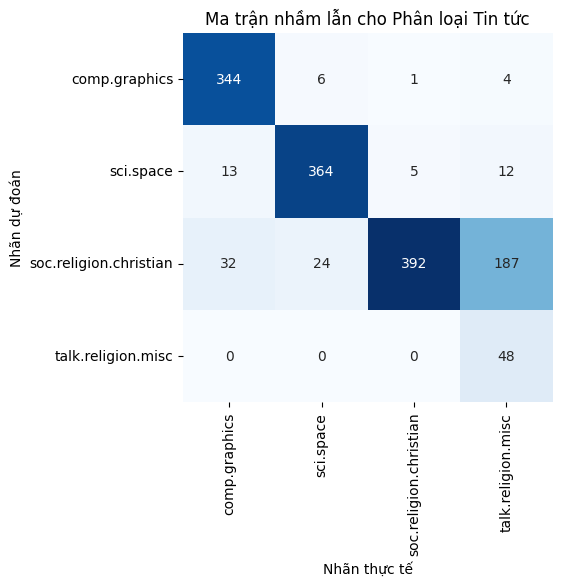

Dự đoán cho 'sending a payload to the ISS': sci.space
Dự đoán cho 'determining the screen resolution': comp.graphics


In [3]:
# 1. Import các thư viện cần thiết
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Tải dữ liệu (chỉ chọn 4 danh mục để minh họa)
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

# 3. Xây dựng pipeline: TfidfVectorizer -> MultinomialNB
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# 4. Huấn luyện mô hình
model.fit(train.data, train.target)

# 5. Dự đoán trên tập kiểm tra
labels = model.predict(test.data)

# 6. Đánh giá mô hình
accuracy = accuracy_score(test.target, labels)
print(f"Độ chính xác phân loại văn bản: {accuracy:.4f}")

# Tạo ma trận nhầm lẫn
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names, cmap='Blues')
plt.xlabel('Nhãn thực tế')
plt.ylabel('Nhãn dự đoán')
plt.title('Ma trận nhầm lẫn cho Phân loại Tin tức')
plt.show()

# 7. Hàm dự đoán cho một câu mới
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

# Thử nghiệm
print(f"Dự đoán cho 'sending a payload to the ISS': {predict_category('sending a payload to the ISS')}")
print(f"Dự đoán cho 'determining the screen resolution': {predict_category('determining the screen resolution')}")

Phân tích kết quả
1. Các ô trên đường chéo (Màu xanh đậm)

Đây là những dự đoán ĐÚNG. Các con số trên đường chéo từ trên xuống dưới, từ trái sang phải cho thấy số lượng tin tức được phân loại chính xác:

 + 344 tin comp.graphics được dự đoán đúng là comp.graphics.

 + 364 tin sci.space được dự đoán đúng là sci.space.

 + 392 tin soc.religion.christian được dự đoán đúng là soc.religion.christian.

 + 48 tin talk.religion.misc được dự đoán đúng là talk.religion.misc.

2. Các ô ngoài đường chéo (Màu xanh nhạt/Trắng)

Đây là những dự đoán SAI (những sự "nhầm lẫn").

Vấn đề lớn nhất: Ô có số 187.

  + Ý nghĩa: Có 187 tin tức có nhãn thực tế là talk.religion.misc (cột cuối) nhưng mô hình lại dự đoán nhầm chúng là soc.religion.christian (hàng thứ 3).

  + Tại sao? Điều này rất dễ hiểu. soc.religion.christian (Thảo luận về Cơ đốc giáo) và talk.religion.misc (Thảo luận chung/linh tinh về tôn giáo) là hai chủ đề có nội dung và từ vựng rất giống nhau. Đây là điểm yếu rõ ràng nhất của mô hình.

Các nhầm lẫn nhỏ khác:

  + 32 tin comp.graphics bị nhầm thành soc.religion.christian.

  + 24 tin sci.space bị nhầm thành soc.religion.christian.

  + 13 tin comp.graphics bị nhầm thành sci.space.

  (Các số nhỏ khác cũng tương tự...)

3. Nhìn theo Hàng (Dự đoán) và Cột (Thực tế)

Nhìn theo Cột (Nhãn thực tế):

  + Cột comp.graphics: Tổng cộng có (344 + 13 + 32 + 0) = 389 tin. Mô hình dự đoán đúng 344 (tỷ lệ rất cao).

  + Cột sci.space: Tổng cộng có (6 + 364 + 24 + 0) = 394 tin. Mô hình dự đoán đúng 364 (tỷ lệ rất cao).

  + Cột talk.religion.misc (Cột cuối): Tổng cộng có (4 + 12 + 187 + 48) = 251 tin. Mô hình chỉ đoán đúng 48 tin! Đây là lớp mà mô hình hoạt động kém nhất.

Nhìn theo Hàng (Nhãn dự đoán):

  + Hàng talk.religion.misc (Hàng cuối): Mô hình đã dự đoán tổng cộng (0 + 0 + 0 + 48) = 48 tin là talk.religion.misc. Và nó đã đúng cả 48 lần (vì các ô khác trên hàng này bằng 0). Điều này có nghĩa là khi mô hình dám nói "Đây là talk.religion.misc", nó rất tự tin và chính xác.

  + Hàng soc.religion.christian (Hàng 3): Mô hình đã dự đoán (32 + 24 + 392 + 187) = 635 tin là soc.religion.christian. Tuy nhiên, trong số đó chỉ có 392 là đúng, còn lại 32, 24, và 187 là dự đoán sai.

Kết luận

Làm tốt: Mô hình phân biệt rất tốt giữa hai nhóm chủ đề lớn: Công nghệ/Khoa học (comp.graphics, sci.space) và Tôn giáo (soc.religion.christian, talk.religion.misc). Bạn có thể thấy rất ít nhầm lẫn chéo giữa hai nhóm này (ví dụ: chỉ 13 tin comp.graphics bị nhầm sang sci.space).

Điểm yếu: Mô hình rất bối rối giữa hai chủ đề tôn giáo. Nó có xu hướng "an toàn" và dự đoán các tin tức tôn giáo chung chung (talk.religion.misc) là soc.religion.christian.

## Kết luận và Khuyến nghị Chiến lược

Phân tích toàn diện này đã làm sáng tỏ thuật toán Naive Bayes từ nền tảng lý thuyết xác suất đến các ứng dụng thực tế phức tạp.

### Tổng hợp Vai trò của Naive Bayes trong Bộ công cụ Học máy Hiện đại

Naive Bayes đã khẳng định vị thế của mình như một thuật toán phân loại xác suất đơn giản, nhanh chóng và hiệu quả một cách đáng ngạc nhiên. Mặc dù nó có thể không phải là thuật toán mạnh nhất để giải quyết mọi bài toán, nhưng nó là một công cụ không thể thiếu để tạo mẫu nhanh, thiết lập đường cơ sở hiệu suất và cho các tác vụ cụ thể như phân loại văn bản, nơi nó vẫn giữ được tính cạnh tranh cao

### Khi nào nên sử dụng Naive Bayes?

Dựa trên các phân tích về ưu và nhược điểm, Naive Bayes nên được xem là một lựa chọn hàng đầu trong các trường hợp sau:

 + Khi cần một mô hình cơ sở nhanh và hiệu quả: Đây là ứng dụng chiến lược quan trọng nhất của nó.

 + Đối với các bài toán phân loại văn bản: Lọc thư rác, phân tích cảm xúc, hoặc phân loại chủ đề là những lĩnh vực mà Naive Bayes thường xuyên tỏa sáng.   

 + Khi tập dữ liệu rất lớn: Khả năng mở rộng tuyến tính của nó làm cho nó trở thành một lựa chọn khả thi khi các thuật toán phức tạp hơn trở nên quá tốn kém về mặt tính toán.

 + Khi tập dữ liệu nhỏ: Do sự đơn giản và không cần học các tương tác phức tạp, Naive Bayes ít bị quá khớp (overfitting) hơn so với các mô hình phức tạp khi dữ liệu huấn luyện bị hạn chế.

 + Khi các đặc trưng tương đối độc lập: Trong những trường hợp hiếm hoi mà giả định độc lập gần đúng, Naive Bayes có thể đạt được hiệu suất rất cao.

Tóm lại, mặc dù có sự "ngây thơ" trong giả định cốt lõi, Naive Bayes vẫn là một thuật toán mạnh mẽ và phù hợp, chứng tỏ rằng trong thế giới học máy, sự đơn giản và hiệu quả tính toán đôi khi có thể vượt qua sự phức tạp về mặt lý thuyết.